# Tick 1a

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# question1

In [12]:
#function pair
def pairs(M): #M is the total number of people
    p = np.random.permutation(M)
    m1 = p[:M//2]
    m2 = p[M//2:M//2 * 2]
    return m1, m2

In [13]:
# test function pair
pairs(6)

(array([5, 3, 0]), array([4, 1, 2]))

In [14]:
#submit q1
import ucamcl
GRADER = ucamcl.autograder('https://markmy.solutions', course='scicomp')
GRADER1a = GRADER.subsection('tick1a')
q = GRADER1a.fetch_question('q1')
m1,m2 = pairs(q.n)
ans = {'n': len(np.unique(np.concatenate([m1,m2]))), 's': np.std(np.abs(m1-m2))}
GRADER1a.submit_answer(q, ans)

Waiting for you to log in ... done.
Correct!


True

# question2

In [15]:
#function is_exposed
def is_exposed(popn, m1, m2): #0 for Susceptible, 1 for Protected, 2 for Infected
    popn = np.array(popn, dtype = int)
    group = (popn[m1] == 2) | (popn[m2] == 2)
    result = np.full((len(popn)), False)
    result[m1] = group
    result[m2] = group          
    return result

In [16]:
#test function is_exposed
is_exposed(np.array([0,0,2,0,0,1]), np.array([3,0,1]), np.array([2,4,5]))

array([False, False,  True,  True, False, False])

In [17]:
#test function is_exposed
q = GRADER1a.fetch_question('q2')
ans = is_exposed(q.popn, q.m1, q.m2)
GRADER1a.submit_answer(q, ans)

Correct!


True

# question3

In [18]:
#function update

#Each person chooses to socialize (with probability prob_socialize) or to isolate.
#The people who chose to socialize are randomly grouped into pairs.
#Within each pair, if one is Infected and the other not, then the other might become Infected. 
#The probability of infection is either prob_infect_susceptible or prob_infect_protected depending on their state.
#At the end of the day, each person who was Infected at the start of the day recovers 
#with probability prob_recover, and become Protected.

def update(popn, prob):
    popn = np.array(popn, dtype = int)
    new_popn = np.copy(popn)
    
    social = np.random.binomial(n = 1, p = prob['socialize'], size = len(popn)).astype(bool)
    social_num = np.sum(social)
    #find index of those socialized and pair them
    m1, m2 = pairs(social_num)
    p1 = np.arange(len(popn))[social][m1] 
    p2 = np.arange(len(popn))[social][m2]
    
    expose = is_exposed(popn, p1, p2)
    
    #for susceptible population
    exposed_sus_index = np.arange(len(popn))[expose & (popn == 0)]
    sus_infected = np.random.binomial(n = 1, p = prob['infect_susceptible'], size = len(exposed_sus_index)).astype(bool)
    new_popn[exposed_sus_index[sus_infected]] = 2
    
    #for protected population
    exposed_pro_index = np.arange(len(popn))[expose & (popn == 1)] 
    pro_infected = np.random.binomial(n = 1, p = prob['infect_protected'], size = len(exposed_pro_index)).astype(bool)
    new_popn[exposed_pro_index[pro_infected]] = 2
    
    new_infected = np.sum(sus_infected) + np.sum(pro_infected)
    
    #for infected population
    infected_index = np.arange(len(popn))[popn == 2]
    inf_recovered = np.random.binomial(n = 1, p = prob['recover'], size = len(infected_index)).astype(bool)
    new_popn[infected_index[inf_recovered]] = 1
    
    return new_popn, new_infected

In [19]:
#test function update
prob = {'socialize': 0.8, 'infect_susceptible': 0.6, 'infect_protected': 0.1, 'recover': 0.1}
popn = np.array([0,2,2,0,2,1])
update(popn, prob)

(array([2, 2, 2, 2, 1, 1]), 2)

In [20]:
q = GRADER1a.fetch_question('q3')
popn = np.where(np.arange(q.n) < q.i0, 2, 0)
popn2,new_infected = update(popn, q.prob)
ans = {'i':np.sum(popn2==2), 'ni':new_infected}
GRADER1a.submit_answer(q, ans)

Correct!


True

# question4

In [21]:
#function sim
def sim(N, T, i0, p0, prob):
    popn = np.zeros(N, dtype = int)
    popn[:i0] = 2
    popn[i0:i0+p0] = 1
    ans = np.zeros(shape = (T, 4), dtype = int)
    row = np.arange(T)
    ans[row] 
    for i in range(T):
        popn, new_infected = update(popn, prob)
        update_sus = np.sum(popn == 0)
        update_pro = np.sum(popn == 1)
        update_inj = np.sum(popn == 2) 
        ans[i] = ([update_sus, update_pro, update_inj, new_infected])
    return ans

In [22]:
sim(20, 20, 5, 3, prob)

array([[ 9,  3,  8,  3],
       [ 7,  4,  9,  2],
       [ 5,  5, 10,  2],
       [ 5,  4, 11,  1],
       [ 5,  4, 11,  1],
       [ 3,  5, 12,  2],
       [ 3,  5, 12,  0],
       [ 2,  6, 12,  1],
       [ 2,  8, 10,  0],
       [ 2,  7, 11,  1],
       [ 1,  8, 11,  1],
       [ 1,  9, 10,  0],
       [ 1,  9, 10,  0],
       [ 1, 11,  8,  0],
       [ 1,  9, 10,  3],
       [ 1,  9, 10,  1],
       [ 0,  9, 11,  1],
       [ 0,  9, 11,  0],
       [ 0,  9, 11,  0],
       [ 0,  9, 11,  0]])

In [23]:
# test function sim
q = GRADER1a.fetch_question('q4')
x = sim(N=q.N, T=q.T, i0=q.i0, p0=q.p0, prob=q.prob)
ans = x[-1,1] / q.N
GRADER1a.submit_answer(q, ans)

Correct!


True

# question 5

In [24]:
def ploting(N, T, i0, p0):
    prob = {'socialize': 0.8, 'infect_susceptible': 0.6, 'infect_protected': 0.1, 'recover': 0.1}
    matrix = sim(N, T, i0, p0, prob)
    sus_num = matrix[:,0]
    pro_num = matrix[:,1]
    inj_num = matrix[:,2]
    new_infected = matrix[:,3]
    
    fig, ax = plt.subplots(2, 1, sharex = True)
    ax[0].plot(np.arange(200), sus_num / 500, label='S', color = 'grey')
    ax[0].plot(np.arange(200), pro_num / 500, label='P', color = 'blue')
    ax[0].plot(np.arange(200), inj_num / 500, label='I', color = 'red')
    ax[0].legend()
    ax[0].set_ylabel('%population')
    
    ax[1].plot(np.arange(200), new_infected, color = 'red')
    ax[1].set_ylabel('new infections')
    
    plt.show()

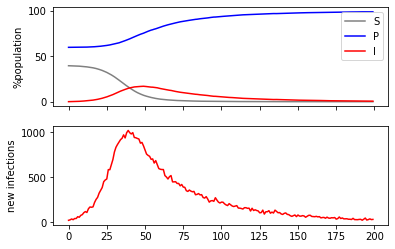

In [25]:
#test ploting
ploting(50000, 200, 100, 30000)

# question 6

In [ ]:
def sim_repeat_plot(N, T, i0, p0):
    prob = {'socialize': 0.8, 'infect_susceptible': 0.6, 'infect_protected': 0.1, 'recover': 0.1}
    fig, ax = plt.subplots(1, 1)
    c = ['red', 'grey', 'orange']
    for i in range(len(p0)):
        for j in range(5):
            matrix = sim(N, T, i0, p0[i], prob)
            inj_num = matrix[:,2]
            ax.plot(np.arange(200), inj_num / 500, color = c[i])
            
    ax.set_ylabel('%popn infected')
    plt.show()

In [ ]:
#test repeat simulation ploting
sim_repeat_plot(50000, 200, 100, [0, 15000, 30000])

# Tick 1b

# question 7

In [28]:
#calculate number r
def r(x, t0, t1, days):
    N = np.sum(x[t0:t1, 3])
    D = np.sum(x[t0 - 1:t1 - 1, 2]) #start of each day, not end of each day when calculating D
    return (days * N) / D

In [29]:
#test function r:
GRADER1b = GRADER.subsection('tick1b')
q = GRADER1b.fetch_question('q7')
ans = r(np.array(q.x), t0=q.t0, t1=q.t1, days=q.days)
GRADER1b.submit_answer(q, ans)

Correct!


True

# question 8

In [30]:
def sim_repeat_r(t0, t1, p0):
    prob = {'socialize': 0.8, 'infect_susceptible': 0.6, 'infect_protected': 0.1, 'recover': 0.1}
    ans = np.zeros(shape = (3, 2), dtype = float)
    for i in range(3):
        matrix = sim(50000, 200, 100, p0[i], prob)
        R = r(matrix, t0, t1, 1/prob['recover'])
        ans[i] = [round(p0[i], 0), round(R, 2)]
    return ans

In [31]:
#test sim_repeat_r
sim_repeat_r(7, 14, [0, 15000, 30000])

array([[0.00e+00, 4.35e+00],
       [1.50e+04, 3.51e+00],
       [3.00e+04, 2.31e+00]])

# question 9 

In [34]:
def localpairs(M, σ):
    loc = np.arange(M) + np.random.normal(loc = 0, scale = σ, size = M)
    index = np.argsort(loc)
    return index[:M//2*2:2], index[1:M//2*2:2]

In [35]:
localpairs(100, 2)

(array([ 0,  2,  3,  7,  6, 12, 11, 16, 13, 15, 20, 21, 25, 22, 29, 30, 31,
        32, 38, 36, 40, 41, 48, 46, 44, 51, 50, 53, 58, 54, 59, 64, 62, 66,
        68, 69, 71, 74, 76, 80, 79, 81, 83, 88, 87, 89, 93, 94, 96, 98]),
 array([ 1,  4,  8,  9,  5, 10, 14, 17, 19, 18, 23, 27, 26, 24, 28, 33, 34,
        37, 35, 42, 39, 45, 43, 47, 49, 52, 56, 55, 57, 60, 63, 61, 67, 65,
        72, 70, 73, 75, 77, 78, 82, 85, 84, 86, 91, 90, 95, 92, 97, 99]))

In [36]:
#test localpairs
q = GRADER1b.fetch_question('q9')
m1,m2 = localpairs(q.n, q.σ)
ans = {'n': len(np.unique(np.concatenate([m1,m2]))), 's': np.std(np.abs(m1-m2))}
GRADER1b.submit_answer(q, ans)

Correct!


True

# question 10

In [37]:
def update_with_localpairs(popn, prob, σ):
    popn = np.array(popn, dtype = int)
    new_popn = np.copy(popn)
    
    social = np.random.binomial(n = 1, p = prob['socialize'], size = len(popn)).astype(bool)
    social_num = np.sum(social)
    #find index of those socialized and pair them
    m1, m2 = localpairs(social_num, σ)
    p1 = np.arange(len(popn))[social][m1] 
    p2 = np.arange(len(popn))[social][m2]
    
    expose = is_exposed(popn, p1, p2)
    
    #for susceptible population
    exposed_sus_index = np.arange(len(popn))[expose & (popn == 0)]
    sus_infected = np.random.binomial(n = 1, p = prob['infect_susceptible'], size = len(exposed_sus_index)).astype(bool)
    new_popn[exposed_sus_index[sus_infected]] = 2
    
    #for protected population
    exposed_pro_index = np.arange(len(popn))[expose & (popn == 1)] 
    pro_infected = np.random.binomial(n = 1, p = prob['infect_protected'], size = len(exposed_pro_index)).astype(bool)
    new_popn[exposed_pro_index[pro_infected]] = 2
    
    new_infected = np.sum(sus_infected) + np.sum(pro_infected)
    
    #for infected population
    infected_index = np.arange(len(popn))[popn == 2]
    inf_recovered = np.random.binomial(n = 1, p = prob['recover'], size = len(infected_index)).astype(bool)
    new_popn[infected_index[inf_recovered]] = 1
    
    return new_popn, new_infected

In [47]:
def sim_with_locality(N, T, i0, p0, prob, σ):
    popn = np.zeros(N, dtype = int)
    #randomly allocate infected and protected population
    '''
    inf_index = np.random.choice(N, i0)
    pro_index = np.random.choice(N, p0)
    popn[inf_index] = 2
    popn[pro_index] = 1
    '''
    spec_index = np.random.choice(N, i0 + p0)
    pro_index = np.random.choice(i0 + p0, p0)
    popn[spec_index[pro_index]] = 1
    popn[spec_index[~pro_index]] = 2
    ans = np.zeros(shape = (T, 4), dtype = int)
    for i in range(T):
        popn, new_infected = update_with_localpairs(popn, prob, σ)
        update_sus = np.sum(popn == 0)
        update_pro = np.sum(popn == 1)
        update_inj = np.sum(popn == 2) 
        ans[i] = ([update_sus, update_pro, update_inj, new_infected])
    return ans, popn

In [45]:
def sim_repeat_plot_local(N, T, i0, p0, delta):
    prob = {'socialize': 0.8, 'infect_susceptible': 0.6, 'infect_protected': 0.1, 'recover': 0.1}
    fig, ax = plt.subplots(1, 1)
    c = ['red', 'grey', 'orange']
    l = ['σ = 5', 'σ = 20', 'σ = 100']
    for i in range(len(delta)):
        for j in range(5):
            matrix = sim_with_locality(N, T, i0, p0, prob, delta[i])
            inj_num = matrix[:,2]
            if j == 0:
                ax.plot(np.arange(200), inj_num / 500, color = c[i], label = l[i])
            else:
                ax.plot(np.arange(200), inj_num / 500, color = c[i])
    ax.legend()
    ax.set_ylabel('%popn infected')
    plt.show()

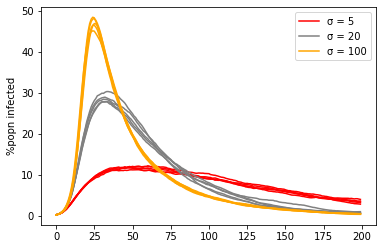

In [46]:
#test question 10
sim_repeat_plot_local(50000, 200, 100, 0, [5, 20, 100])

# question11

In [43]:
q = GRADER1b.fetch_question('q11')
x = sim_with_locality(N=q.N, T=q.t1, i0=q.i0, p0=q.p0, prob=q.prob, σ=q.σ)
ans = r(x, t0=q.t0, t1=q.t1, days=1/q.prob['recover'])
GRADER1b.submit_answer(q, ans)

Correct!


True